### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
data.isnull().sum().sort_values(ascending=False)/len(data)

car                     0.991485
CoffeeHouse             0.017108
Restaurant20To50        0.014901
CarryAway               0.011905
RestaurantLessThan20    0.010249
Bar                     0.008436
destination             0.000000
passanger               0.000000
direction_opp           0.000000
direction_same          0.000000
toCoupon_GEQ25min       0.000000
toCoupon_GEQ15min       0.000000
toCoupon_GEQ5min        0.000000
income                  0.000000
occupation              0.000000
education               0.000000
has_children            0.000000
maritalStatus           0.000000
age                     0.000000
gender                  0.000000
expiration              0.000000
coupon                  0.000000
time                    0.000000
temperature             0.000000
weather                 0.000000
Y                       0.000000
dtype: float64

### Findings
```
    99% of 'car' (type of car driven) is missing values.
    There are 5 other columns missing about 1%
```

3. Decide what to do about your missing data -- drop, replace, other...

### Cleanup
```
    Drop the 'car' column
    Replace 1% missing value columns with, frequently occuring (mode) values
```

In [6]:
def replaceFrequent(col):
    return data[col].fillna(data[col].value_counts().index[0])

data['Bar'] = replaceFrequent('Bar')
data['CoffeeHouse '] = replaceFrequent('CoffeeHouse')
data['Restaurant20To50'] = replaceFrequent('Restaurant20To50')
data['CarryAway'] = replaceFrequent('CarryAway')
data['RestaurantLessThan20'] = replaceFrequent('RestaurantLessThan20')                           

data.drop('car', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12467 non-null

### Data Cleaning
```
    Check for duplicate rows and just keep one
    74 (about .6%) dups were found

```

In [7]:
dups= data[data.duplicated(keep = 'first')]
print(f'Num dups: {dups.shape[0]}  % dups: {100*(dups.shape[0]/data.shape[0]):.2}%')


Num dups: 74  % dups: 0.58%


```
     Drop duplicates
```

In [8]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12393 non-null

### Data cleanup
```
        Drop rows with NaN
```

In [9]:
data.dropna(inplace=True)
data.shape

(12393, 26)

4. What proportion of the total observations chose to accept the coupon? 



In [10]:
coupon_counts = data.groupby('Y').Y.count()/data.shape[0]
print(f'Reject coupons: {coupon_counts[0]*data.shape[0]}   %: {100*coupon_counts[0]:.1f}')
print(f'Chose to accept coupons: {coupon_counts[1]*data.shape[0]}   %: {100*coupon_counts[1]:.1f}')

Reject coupons: 5346.0   %: 43.1
Chose to accept coupons: 7047.0   %: 56.9


### Findings
56.9% chose to accept the coupon. 

5. Use a bar plot to visualize the `coupon` column.

<Axes: title={'center': 'Coupon types by %'}, xlabel='Coupon Type', ylabel='%'>

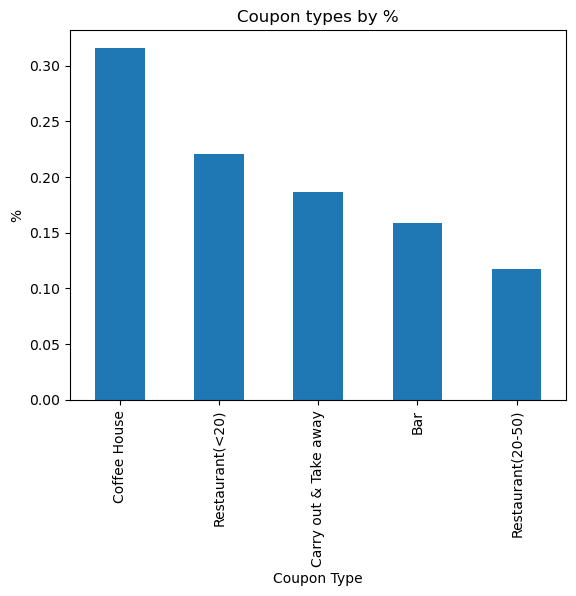

In [11]:
(data['coupon'].value_counts()/data.shape[0]).plot(kind='bar', title='Coupon types by %',
                                                   xlabel='Coupon Type',
                                                   ylabel='%')

### Findings
```
    32% of coupons where for coffee house
    22% of coupons where for restaurants
```

6. Use a histogram to visualize the temperature column.

array([[<Axes: title={'center': 'temperature'}>]], dtype=object)

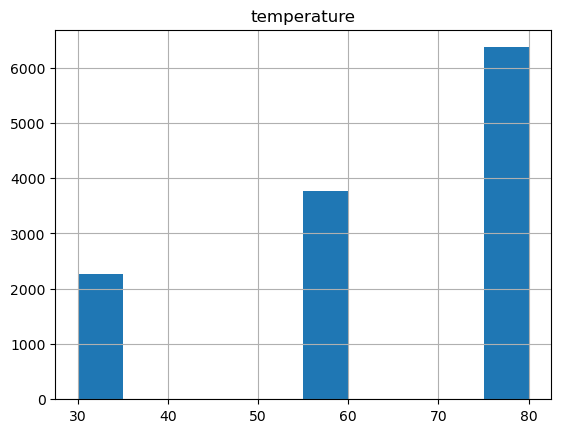

In [12]:
data.hist(column='temperature')

```
    3 unique values of temperatures where found. About 50% values where 80F

```

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
data_bar = data.query('coupon == "Bar"')
data_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,CoffeeHouse
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,0,never
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,0,0,1,0,1,never
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,1,0,1,0,never
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,less1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,less1


2. What proportion of bar coupons were accepted?


In [25]:
bar_coupons_accepted = data_bar.query('Y == 1').value_counts().shape[0]
print(f'Total bar visits: {data_bar.shape[0]}')
print(f'Bar coupons accepted: {bar_coupons_accepted}  percent: {(bar_coupons_accepted/data_bar.shape[0])*100:.1f}%')

Total bar visits: 1971
Bar coupons accepted: 811  percent: 41.1%


### Findings 
```
    Among coupon of kind 'Bar', 41% was accepted 
```

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [15]:
data_bar.Bar.unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [92]:
upto_3 = data_bar.query(' (Y==1) and (Bar in ["less1", "1~3"]) ').shape[0]
morethan_3 = data_bar.query(' (Y==1) and (Bar in ["gt8", "4~8"]) ').shape[0]
print(f'Total bar visits:                   {data_bar.shape[0]}')
print(f'Bar coupons accepted:               {bar_coupons_accepted}      percent: {(bar_coupons_accepted/data_bar.shape[0])*100:.1f}%')
print(f'<= 3 bar visits acceptance - total: {upto_3}      proportion: {(upto_3/bar_coupons_accepted)*100:.1f}')
print(f'>3 bar visits acceptance - total:   {morethan_3}      proportion: {(morethan_3/bar_coupons_accepted)*100:.1f}')


Total bar visits:                   1971
Bar coupons accepted:               811      percent: 41.1%
<= 3 bar visits acceptance - total: 503      proportion: 62.0
>3 bar visits acceptance - total:   150      proportion: 18.5


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [86]:

driver_1m25age_over = data_bar.query(' (Y==1) and (age not in ["21", "below21"] ) and (Bar in ["1~3", "gt8", "4~8"]) ').shape[0]
all_others = bar_coupons_accepted - driver_1m25age_over
print(f'Total bar visits:               {data_bar.shape[0]}')
print(f'Bar coupons accepted:           {bar_coupons_accepted}  percent: {(bar_coupons_accepted/data_bar.shape[0])*100:.1f}%')
print(f'>1m age>25, accepted- total:    {driver_1m25age_over}  proportion: {(driver_1m25age_over/bar_coupons_accepted)*100:.1f}')
print(f'All others, accepted:           {all_others}  proportion: {(all_others/bar_coupons_accepted)*100:.1f}')


Total bar visits:               1971
Bar coupons accepted:           811  percent: 41.1%
>1m age>25, accepted- total:    287  proportion: 35.4
All others, accepted:           524  proportion: 64.6


### Findings
```
    Drivers over the age of 25, who visited the bar more than once a month, acceptance propotion was 35% (287/811)
    This category has significant acceptance rate.
```

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [87]:

drv_nok_occ= data_bar.query('(Y==1) and (passanger not in ["Kid\(s\)"] ) and (Bar in ["1~3", "gt8", "4~8"]) and (occupation not in ["Farming Fishing & Forestry"])').shape[0]
all_rest = bar_coupons_accepted - drv_nok_occ
print(f'Total bar visits:                       {data_bar.shape[0]}')
print(f'Bar coupons accepted:                   {bar_coupons_accepted}          percent: {(bar_coupons_accepted/data_bar.shape[0])*100:.1f}%')
print(f'>1m/no kid/occupation accepted- total:  {drv_nok_occ}          proportion: {(drv_nok_occ/bar_coupons_accepted)*100:.1f}')
print(f'All others, accepted:                   {all_rest}          proportion: {(all_rest/bar_coupons_accepted)*100:.1f}')





Total bar visits:                       1971
Bar coupons accepted:                   811          percent: 41.1%
>1m/no kid/occupation accepted- total:  405          proportion: 49.9
All others, accepted:                   406          proportion: 50.1


### Findings
```
    Acceptance rate for drivers going to bar more than once a month, without kid passengers and occupation other than 
    farming, fishing or forestery acceptance rate was 50%
```

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [90]:
def rate_of_acceptance(num, total):
    return (num/total)*100


total_accepted_coupons = data.query('Y == 1').shape[0]
plus_1m_bar_no_kid_not_widow = data.query( '(Y == 1) and (passanger not in ["Kid\(s\)"] ) and (Bar in ["1~3", "gt8", "4~8"]) and (maritalStatus not in ["Widowed"])').shape[0]
plus_1m_bar_age_less_30 = data.query( '(Y == 1) and (Bar in ["1~3", "gt8", "4~8"]) and (age in ["26", "21"])').shape[0]
restaurant_4_income_less_50k = data.query( '(Y == 1) and ( RestaurantLessThan20 in ["4~8", "gt8"]) and (income in ["$37500 - $49999"])').shape[0]

print(f'Total drivers:                          {data.shape[0]}')
print(f'Percent accepted coupons:               total: {total_accepted_coupons}         percent:{rate_of_acceptance(total_accepted_coupons, data.shape[0]):.1f}')
print(f'>1m, !kids, !widow accepted coupons:    total: {plus_1m_bar_no_kid_not_widow}       propotion:{rate_of_acceptance(plus_1m_bar_no_kid_not_widow, total_accepted_coupons):.1f}')
print(f'>1m, age<30 accepted coupons:           total: {plus_1m_bar_age_less_30}       propotion:{rate_of_acceptance(plus_1m_bar_age_less_30, total_accepted_coupons):.1f}')
print(f'>4rest, income<50k accepted coupons:    total: {restaurant_4_income_less_50k}       propotion:{rate_of_acceptance(restaurant_4_income_less_50k, total_accepted_coupons):.1f}')





Total drivers:                          12393
Percent accepted coupons:               total: 7047         percent:56.9
>1m, !kids, !widow accepted coupons:    total: 2390       propotion:33.9
>1m, age<30 accepted coupons:           total: 1368       propotion:19.4
>4rest, income<50k accepted coupons:    total: 412       propotion:5.8


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Findings
```
    Based on the observations
    
       1 : Occupation like "Fishery, Farming & Forestory" requires early rising and relatively hard labor. So customers whose occupation was not that and drove to bar without kids, accepted a proportion of 50% of the bar coupons. 

       2 : On a broader category, customer who went to bar less than 3 times a month , accepted
        a proportion of 62.5% of bar coupons.  Frequenting the bar less, may indicate a relatively lower income  so using the coupon saves them relatively more money in proportion to their income.

       3 : Customers frequenting the bars more than once over the age of 25, had a proportion acceptance of 35.4%. Mostly 
        these customers may be by themselves (cannot share, higher consumption as no need for designated driver) tending to
        use coupons more.

```

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [108]:
data.query('(coupon == "Coffee House") and (Y == 1)').CoffeeHouse.unique()


array(['never', '4~8', '1~3', 'less1', 'gt8'], dtype=object)

<Axes: >

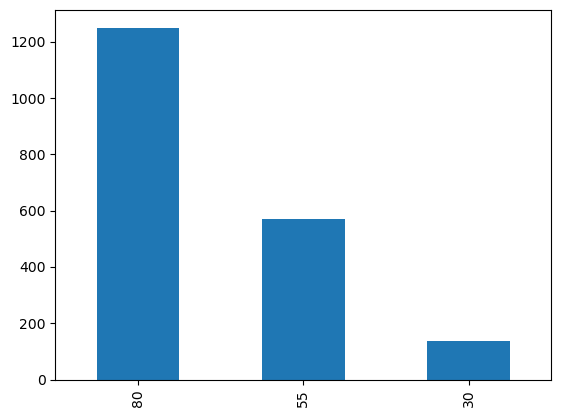

In [112]:
data.query('(coupon == "Coffee House") and (Y == 1)')['temperature'].value_counts().plot(kind='bar')


<Axes: >

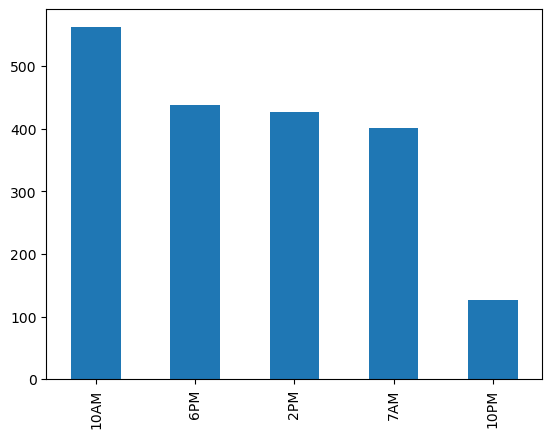

In [113]:

data.query('(coupon == "Coffee House") and (Y == 1)')['time'].value_counts().plot(kind='bar')

<Axes: >

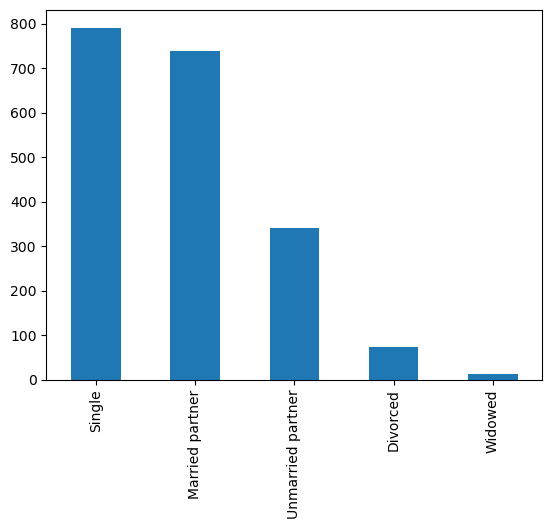

In [114]:
data.query('(coupon == "Coffee House") and (Y == 1)')['maritalStatus'].value_counts().plot(kind='bar')


<Axes: >

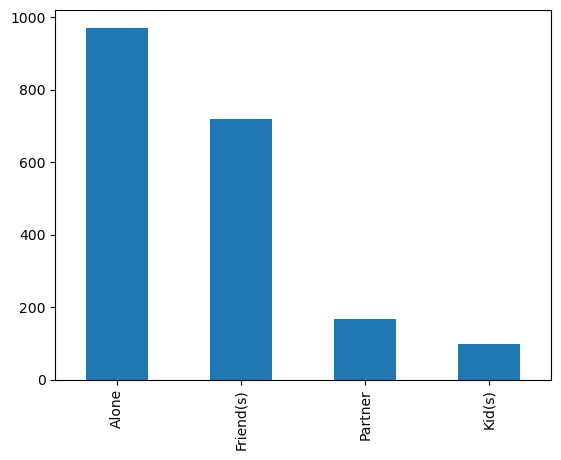

In [117]:
data.query('(coupon == "Coffee House") and (Y == 1)')['passanger'].value_counts().plot(kind='bar')

<Axes: >

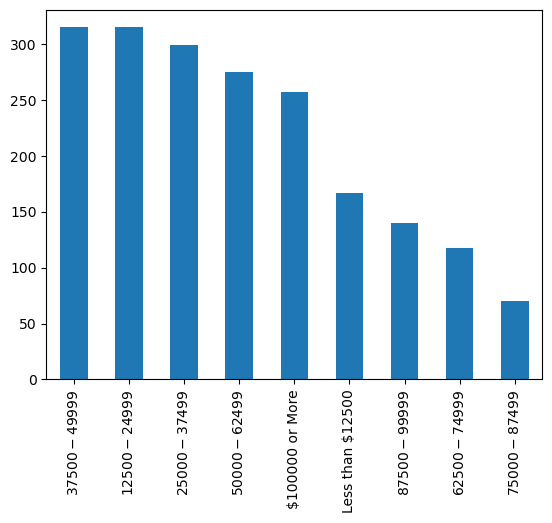

In [118]:
data.query('(coupon == "Coffee House") and (Y == 1)')['income'].value_counts().plot(kind='bar')